In [71]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = pd.read_csv(r'C:\Users\nico_\Desktop\Time series\UDEMY_TSA_FINAL\UDEMY_TSA_FINAL\Data\BeerWineLiquor.csv')

In [22]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [28]:
len(df)

324

In [32]:
df.columns = ['ds','y']

In [34]:
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [51]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [36]:
df['ds'] = pd.to_datetime(df['ds'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      324 non-null    datetime64[ns]
 1   y       324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [40]:
m = Prophet()
m.fit(df)

16:37:45 - cmdstanpy - INFO - Chain [1] start processing
16:37:49 - cmdstanpy - INFO - Chain [1] done processing


## Placeholder to hold our future predictions

In [45]:
future = m.make_future_dataframe(periods=24, freq='MS') # 24 mois

In [47]:
future

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01
...,...
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01


In [49]:
len(future)

348

In [53]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


### future contient les periodes connus mais aussi 2 ans dans le futur

In [57]:
forecast = m.predict(future)

In [59]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1763.763820,1142.968695,1469.472215,1763.763820,1763.763820,-461.318276,-461.318276,-461.318276,-461.318276,-461.318276,-461.318276,0.0,0.0,0.0,1302.445544
1,1992-02-01,1766.914160,1176.882079,1486.511523,1766.914160,1766.914160,-426.414880,-426.414880,-426.414880,-426.414880,-426.414880,-426.414880,0.0,0.0,0.0,1340.499281
2,1992-03-01,1769.861253,1427.564287,1765.588205,1769.861253,1769.861253,-178.480729,-178.480729,-178.480729,-178.480729,-178.480729,-178.480729,0.0,0.0,0.0,1591.380524
3,1992-04-01,1773.011594,1424.814731,1744.491483,1773.011594,1773.011594,-196.071714,-196.071714,-196.071714,-196.071714,-196.071714,-196.071714,0.0,0.0,0.0,1576.939880
4,1992-05-01,1776.060310,1662.471781,1983.472838,1776.060310,1776.060310,44.753299,44.753299,44.753299,44.753299,44.753299,44.753299,0.0,0.0,0.0,1820.813610


In [61]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [65]:
forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].tail(24)

,ds,yhat_lower,yhat_upper,yhat
324,2019-01-01,4287.384154,4613.061047,4444.089458
325,2019-02-01,4307.066265,4635.055105,4468.900039
326,2019-03-01,4542.024304,4881.889398,4708.043553
327,2019-04-01,4574.119794,4895.844639,4731.427650
328,2019-05-01,4841.392268,5172.268953,5003.149330
329,2019-06-01,4836.906839,5146.452100,4992.963748
330,2019-07-01,4973.907841,5304.252311,5139.161202
331,2019-08-01,4886.037121,5199.831233,5047.045726
332,2019-09-01,4753.104848,5062.870892,4906.813951
333,2019-10-01,4834.810198,5130.959838,4987.932339


(16071.0, 18628.0)

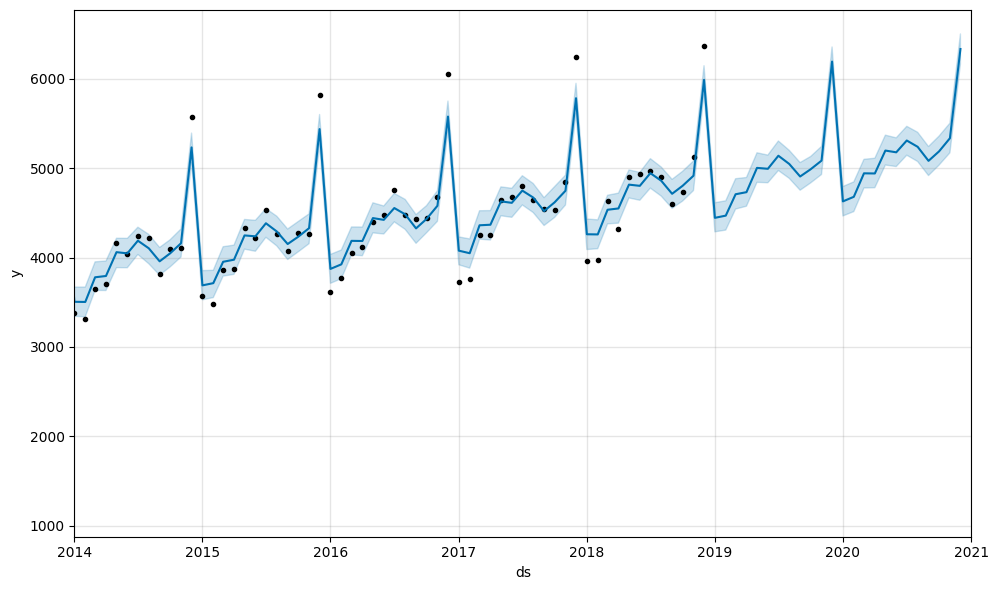

In [77]:
m.plot(forecast)
plt.xlim(pd.to_datetime('2014-01-01'), pd.to_datetime('2021-01-01'))

<Axes: xlabel='ds'>

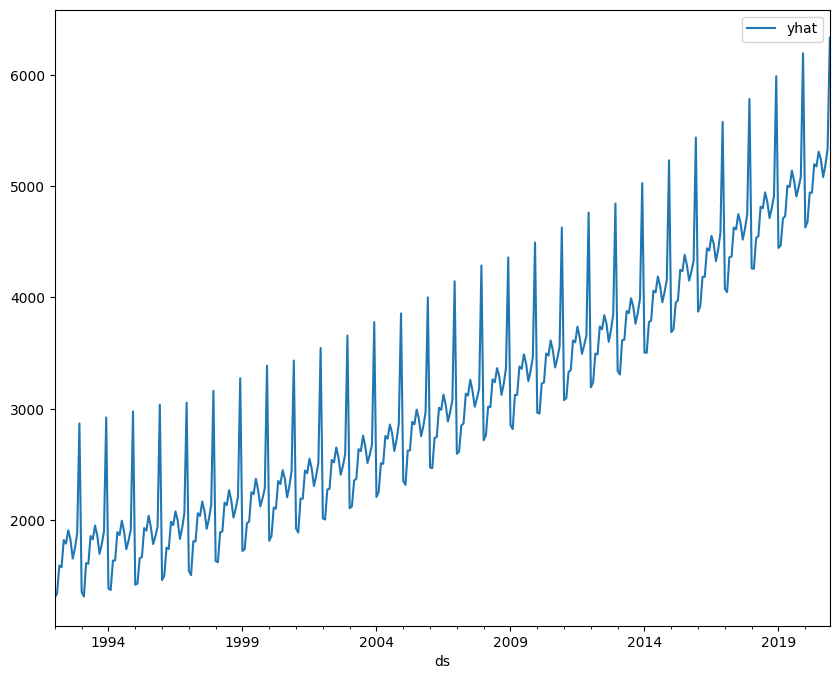

In [83]:
forecast.plot(x='ds', y='yhat', figsize=(10,8))

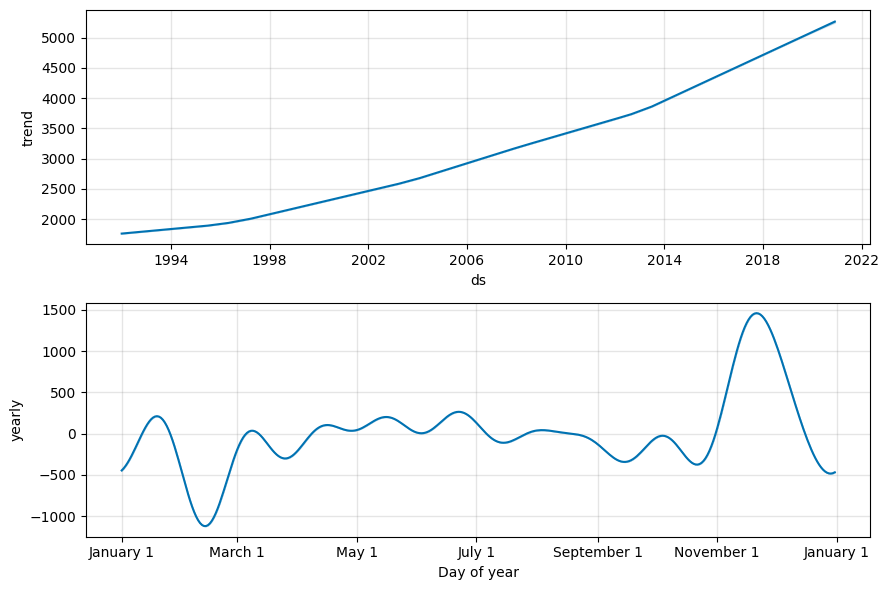

In [89]:
m.plot_components(forecast);